# Netflix Archive


---

### Introduzione


L'analisi condotta sul vasto archivio di film Netflix, compresi nel periodo dal 1950 al 2022, mira a esplorare l'evoluzione della cinematografia degli ultimi 70 anni, ad oggi disponibile sulla piattaforma, focalizzandosi principalmente sulle valutazioni IMDb. La ricca diversità di film e serie TV offerti su Netflix fornisce un'opportunità unica per esaminare le dinamiche culturali e artistiche attraverso le epoche, mentre l'uso delle valutazioni IMDb aggiunge un elemento cruciale per misurare l'apprezzamento del pubblico nel tempo.
<br><br>
*(**fonti** alla fine)*

---

### Obiettivi

* Analisi Temporale delle Valutazioni IMDb: Esplorare l'andamento temporale delle valutazioni IMDb delle produzioni cinematografiche su Netflix dal 1950 al 2022, identificando le fasi di cambiamento e le costanti nel gradimento del pubblico.
* Riconoscimento delle principali fasce d'età a cui si rivolge la piattaforma
* Indagare su quali siano i contenuti preferiti dagli utenti e quale sia la reale distinizione tra Film e Serie TV, un fenomeno che ad oggi sta spopolando
* Scoprire la relazione che esiste tra evoluzione del cinema e gradimento degli utenti

---

### Comprensione dei Dati

* **title**: nome del Film/Serie TV
* **type**: identifica se il contenuto in questione sia effettivamente un Film o una Serie TV
* **description**: breve sinossi del contenuto multimediale in questione
* **release_year**: anno di rilascio del Film/Serie TV
* **age_certification**: classificazione d'età applicata da Netflix per i vari target utente
* **runtime**: lunghezza di un episodio per una Serie TV / Durata di un film
* **imdb_score**: punteggio assegnato dagli utenti della piattaforma IMDb ad un determinato titolo
* **imdb_votes**: numero di voti assegnati dagli utenti di IMDb

---

### IMDb, cos'è?


IMDb, acronimo di **Internet Movie Database**, è un sito web proprietà di Amazon company che cataloga, archivia **film**, **attori**, **registi**, **personale di produzione**, **serie TV**, e anche **videogiochi**. 

Nasce nell'ottobre del **1990** come una raccolta di script priva di interfaccia che permetteva ad utenti di gruppi di discussione di filtrare le categorie secondo gli argomenti delle **FAQ**. 

Nel **1998** venne acquisita da **Amazon** e nel **2015** il servizio venne integrato direttamente sulle **Fire TV** di proprietà dell'azienda, contribuendo di fatto all'affermazione di IMDb come piattaforma di riferimento standard per quanto riguarda la raccolta di informazioni utili sul mondo cinematografico e il **gradimento** da parte del pubblico, che contribuisce allo sviluppo dell'applicazione tramite la valutazione dei contenuti su scala **1-10**.

---

### Librerie

Importazione delle librerire necessarie per le funzioni di analisi

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.ticker import ScalarFormatter
import seaborn as sns

---

### Dataset

Il seguente DataSet contiene esaustive informazioni riguardo a vari titoli ad oggi disponibili sulla piattaforma di streaming Netflix, inlcusi alcuni parametri tecnici di interesse che sono risultati fondamentali per compiere la seguente analisi.

Importazione dei dati dal file CSV scelto e visualizzazione delle informazioni riguardanti il tipo di dati presenti

In [3]:
df = pd.read_csv('Netflix TV Shows and Movies.csv')
df.head(3)

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0


Controllo con quali tipi di dati avrò a che fare tramite info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


Evidenzio la presenza di alcuni valori "NULL" per quanto riguarda il campo "imdb_votes"

In [5]:
df['imdb_votes'].isna().sum()

16

Applico all'intero DataFrame un funzione per "scartare" gli elementi nulli e successivamente ne verifico la corretta applicazione 

In [6]:
df = df.dropna(subset=['imdb_votes'])
df['imdb_votes'].isna().sum()

0

---

## Visualizzazione Dati

A questo punto tramite un istogramma della libreria Seaborn verifico graficamente la distribuzione dei punteggi IMDb sul totale dei film e serie TV presenti nel DataFrame

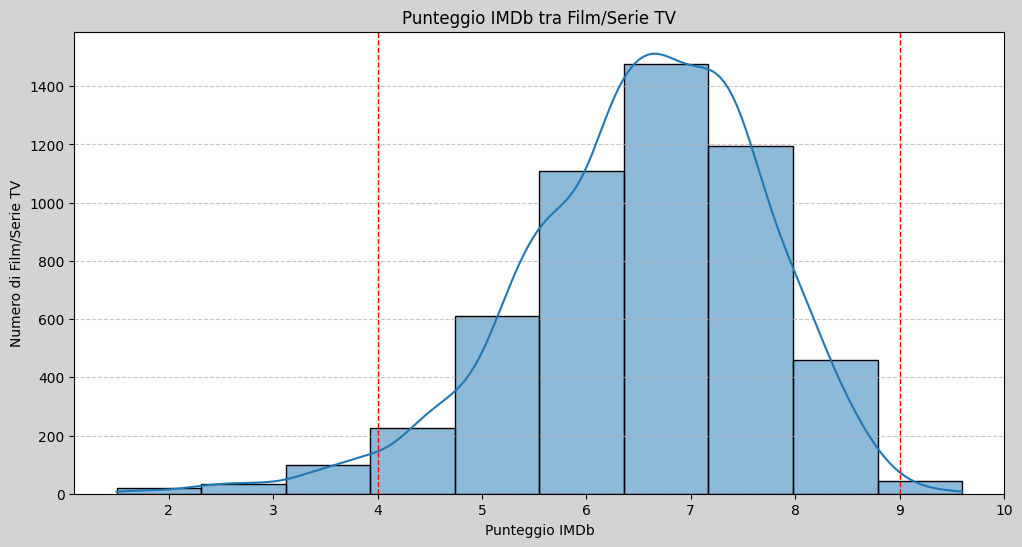

In [7]:
plt.figure(figsize=(12, 6), facecolor='lightgray')

sns.histplot(df['imdb_score'], kde=True, bins=10)

plt.title('Punteggio IMDb tra Film/Serie TV')
plt.xlabel('Punteggio IMDb')
plt.ylabel('Numero di Film/Serie TV')

# Linea per mostrare un comportamento intorno a x=4
plt.axvline(x=4, color='r', linestyle='--', linewidth=1)

# Linea per mostrare un comportamento intorno a x=9
plt.axvline(x=9, color='r', linestyle='--', linewidth=1)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

La linea azzurra rappresenta la stima della **densità di probabilità** della distribuzione delle valutazioni e rivela che:
* I film/serie TV con valutazione media di circa 7.0 punti rappresentano la **maggioranza**. <br>
* I film/serie TV con meno di 4.0 punti e con più di 9.0 sono invece in **minoranza**.

----

### Distribuzione Dati

Calcolo quindi graficamente quale sia la differenza quantitativa tra film e serie TV

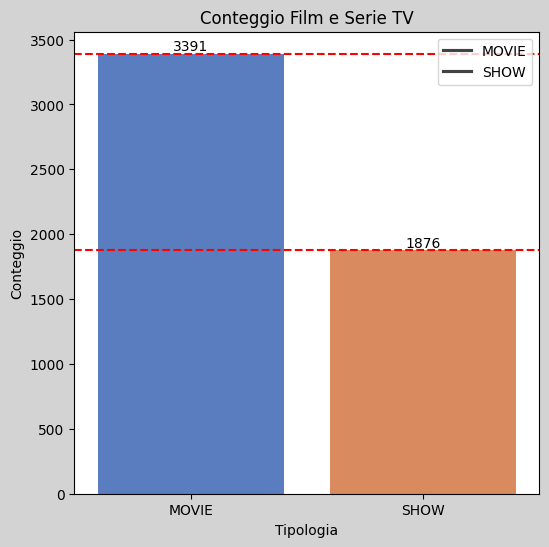

In [32]:
content_count = df['type'].value_counts()

plt.figure(figsize=(6, 6), facecolor='lightgray')
sns.barplot(x=content_count.index, y=content_count.values, palette='muted', hue=content_count.index)

for i, count in enumerate(content_count):
    plt.axhline(y=count, color='red', linestyle='--', label=f'Max Count for {content_count.index[i]}')

# Annotate count values on top of each bar
for i, count in enumerate(df['type'].value_counts()):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Conteggio Film e Serie TV')
plt.xlabel('Tipologia')
plt.ylabel('Conteggio')

plt.legend(labels=content_count.index)
plt.show()

In [9]:
far_date = df['release_year'].min()
recent_date = df['release_year'].max()


print(f"Il film/La serie TV più datata all'interno del DataFrame risale al {far_date}...")
print(f"...mentre il film/serie TV più recente è stato rilasciato nel {recent_date}")
print("----------------------------------------------------------------------------------------")
print(f"La prima Serie TV / Show / Sitcom / Soap-Opera / ... è stata rilasciata nel:")
print(df[(df['type']=='SHOW')][['release_year']].min())


Il film/La serie TV più datata all'interno del DataFrame risale al 1953...
...mentre il film/serie TV più recente è stato rilasciato nel 2022
----------------------------------------------------------------------------------------
La prima Serie TV / Show / Sitcom / Soap-Opera / ... è stata rilasciata nel:
release_year    1969
dtype: int64


Il grafico mostra che a partire 1953 fino al giorno d'oggi, sono stati realizzati **film** pari a circa il **doppio** delle Serie TV, infatti le serie diventano comuni solo circa **20 anni** dopo <br>l'affermazione dei film, nel **1969**

---

### Contenuti con valutazion superiore a 9.0 

Vado a definire un nuovo "sub-DataFrame" che contiene tutti i contenuti multimediali **misti** Film/Serie TV con valutazione media **IMDb duperiore a 9.0 **dal 1953 al 2022

In [10]:
high_rate_movies_9 = df[df['imdb_score']>=9]
print(f"I contenuti in questione sono: {high_rate_movies_9['imdb_score'].count()}")
high_rate_movies_9

I contenuti in questione sono: 21


,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
24,24,tm76557,No Longer Kids,MOVIE,"By coincidence, Ahmad discovers that his fathe...",1979,NaN,235,tt8312792,9.0,943.0
194,194,ts28516,Okupas,SHOW,"During the year 2000, Ricardo, Pollo, Walter a...",2000,TV-MA,40,tt0289649,9.0,2326.0
229,229,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,tt0903747,9.5,1727694.0
245,245,ts3371,Avatar: The Last Airbender,SHOW,"In a war-torn world of elemental magic, a youn...",2005,TV-Y7,24,tt0417299,9.3,297336.0
256,256,ts11313,DEATH NOTE,SHOW,Light Yagami is an ace student with great pros...,2006,TV-14,24,tt0877057,9.0,302147.0
622,622,ts160526,Khawatir,SHOW,A TV show devoted to help young people to be m...,2005,TV-14,20,tt3062514,9.6,3046.0
673,673,ts32835,Hunter x Hunter,SHOW,Twelve-year-old Gon Freecss one day discovers ...,2011,TV-14,23,tt2098220,9.0,87857.0
822,822,tm166740,Chhota Bheem & Krishna in Mayanagari,MOVIE,Bheem and his Friends are having a great time ...,2011,G,66,tt16235600,9.0,5.0
860,860,ts20682,Attack on Titan,SHOW,"Several hundred years ago, humans were nearly ...",2013,TV-MA,24,tt2560140,9.0,325381.0
1033,1033,ts121189,"Raja, Rasoi Aur Anya Kahaniyaan",SHOW,Explore the history and flavors of regional In...,2014,NaN,29,tt6953924,9.0,327.0


Ora applichiamo a questa selezione una distinzione effettiva tra Film e Serie TV:

***Film*** con valutazione IMDb superiore a 9.0 ...

In [11]:
print("Film con valutazione IMDb superiore a 9.0: \n\n")
print(high_rate_movies_9[(high_rate_movies_9['type']=='MOVIE')][['title', 'imdb_votes', 'imdb_score']].sort_values(by='imdb_votes', ascending=False))

Film con valutazione IMDb superiore a 9.0: 


                                         title  imdb_votes  imdb_score
3172  David Attenborough: A Life on Our Planet     31180.0         9.0
2685                         C/o Kancharapalem      6562.0         9.0
24                              No Longer Kids       943.0         9.0
822       Chhota Bheem & Krishna in Mayanagari         5.0         9.0


... e ***Serie TV*** con valutazione IMDb superiore a 9.0

In [12]:
print("Serie TV con valutazione IMDb superiore a 9.0: \n\n")
print(high_rate_movies_9[(high_rate_movies_9['type']=='SHOW')][['title', 'imdb_votes', 'imdb_score']].sort_values(by='imdb_votes', ascending=False))


Serie TV con valutazione IMDb superiore a 9.0: 


                                           title  imdb_votes  imdb_score
229                                 Breaking Bad   1727694.0         9.5
860                              Attack on Titan    325381.0         9.0
256                                   DEATH NOTE    302147.0         9.0
245                   Avatar: The Last Airbender    297336.0         9.3
4429                                      Arcane    175412.0         9.1
3026                              The Last Dance    108321.0         9.1
673                              Hunter x Hunter     87857.0         9.0
3597                                Kota Factory     66985.0         9.3
3144                                  Our Planet     41386.0         9.3
1346                                  Reply 1988      6557.0         9.2
1189  Leah Remini: Scientology and the Aftermath      5761.0         9.0
1953                                   My Mister      5481.0         9.2
6

Come si nota, le serie ***in fondo*** alla lista presentano un'alta valutazione (**IMDb_Score**) ma in generale pochi voti (**IMDb_Votes**), perciò deve essere fattore di interesse durante la fase di analisi del punteggio IMDb anche il numero di **valutazioni**

Visualizzo quindi i contenuti con valutazione IMDb superiore a 9.0 ma, questa volta, **filtrati** in modo tale da rappresentare solo quelli con un numero di voti superiore a **10'000**

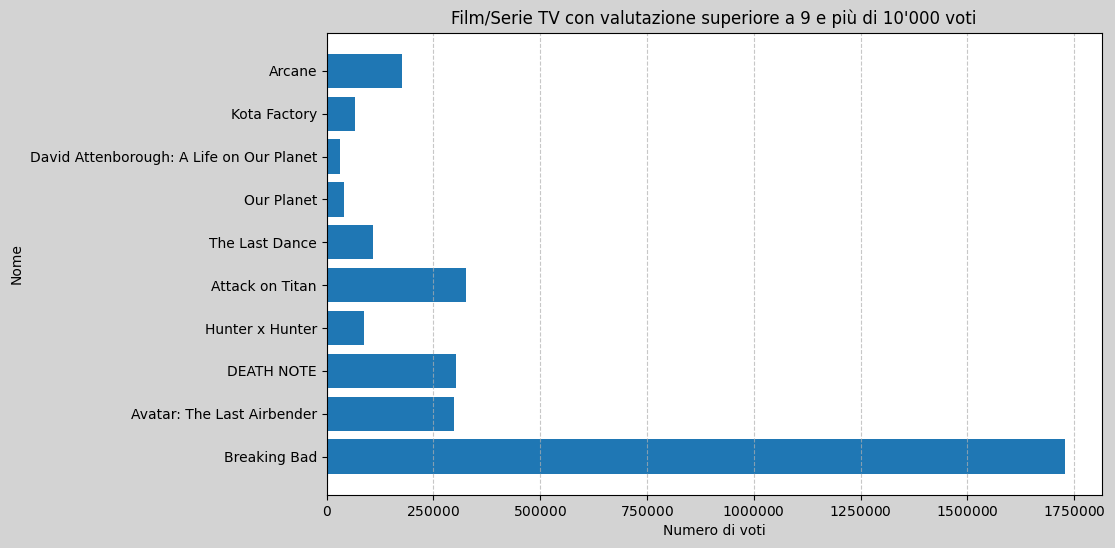

In [13]:
high_rate_movies_9_filtered = high_rate_movies_9[high_rate_movies_9['imdb_votes'] > 10000]

plt.figure(figsize=(10, 6), facecolor='lightgray')
plt.barh(high_rate_movies_9_filtered['title'], high_rate_movies_9_filtered['imdb_votes'])

# Impostazione del formato dell'asse x per visualizzare i numeri non in notazione scientifica
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Film/Serie TV con valutazione superiore a 9 e più di 10\'000 voti')
plt.xlabel('Numero di voti')
plt.ylabel('Nome')

plt.grid(axis='x', linestyle='--', alpha=0.7)

---

### I più "lunghi"

Vogliamo quindi capire tra tutti i film/serie del DataFrame, indifferentemente da quali siano le valutazioni, quali sono i contenuti con **tempo di visualizzazione** (runtime) maggiore

In [33]:
print("Il film più lungo è: \n\n")
df[df['type'] == 'MOVIE'].sort_values(by='runtime', ascending=False).head(1)

Il film più lungo è: 




,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
24,24,tm76557,No Longer Kids,MOVIE,"By coincidence, Ahmad discovers that his fathe...",1979,NaN,235,tt8312792,9.0,943.0


Link al film: [No Longer Kids](https://www.imdb.com/title/tt8312792/?ref_=fn_al_tt_1)

- - -

In [35]:
print("La Serie TV più lunga per episodi è: \n\n")
(df[df['type'] == 'SHOW'].sort_values(by='runtime', ascending=False).head(1))

La Serie TV più lunga per episodi è: 




,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
3598,3598,ts90995,1994,SHOW,Archival video and new interviews examine Mexi...,2019,TV-MA,178,tt10243640,7.5,514.0


Link alla serie: [1994](https://www.imdb.com/title/tt8736278/?ref_=fn_al_tt_1)

---

## Certificazioni d'età

In [16]:
ages = df['age_certification'].unique()
print(f"Ci sono esattamente {len(ages)} fasce di età")

Ci sono esattamente 12 fasce di età


I contenuti Netflix vengono classificati secondo **12 fasce d'età** in modo tale da garantire la migliore esperienza possibile alle variegate categorie di utenti

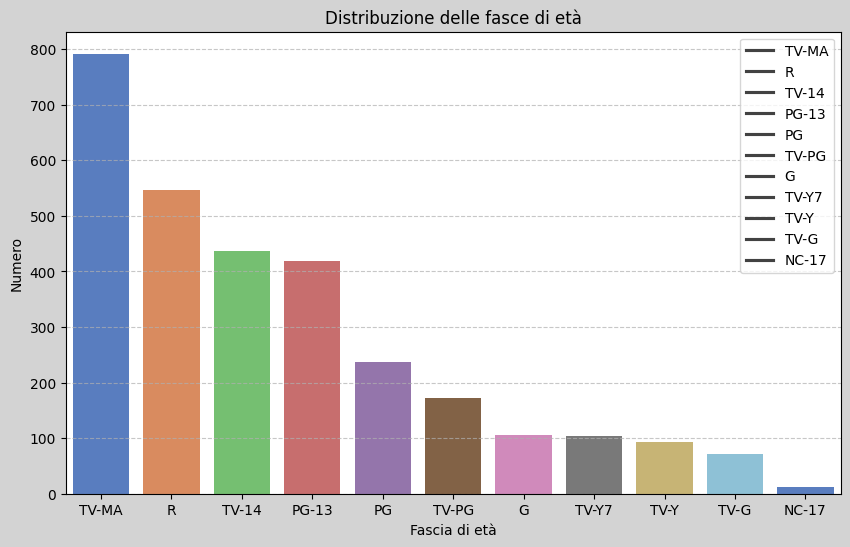

In [17]:
#distribuzione delle età
certification_counts = df['age_certification'].value_counts()

plt.figure(figsize=(10, 6), facecolor='lightgray')
sns.barplot(x=certification_counts.index, y=certification_counts.values, palette='muted', hue=certification_counts.index)

plt.legend(labels=certification_counts.index)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Distribuzione delle fasce di età')

plt.xlabel('Fascia di età')
plt.ylabel('Numero')
plt.show()


Le fasce d'età presentano codici di identificazione che non lasciano spazio ad una rapida comprensione del **target** di utenti a cui sono rivolte, perciò risulta necessario approfondirle:

#### Significato delle fasce d'età : 
* <b>'R' = Adults(+18)</b> <br>
* 'PG' = Older Kids (+7)<br>
* 'TV-14' = Young Adults (+16)<br>
* 'G' = Kids (All)<br>
* 'PG-13' = Teens(+13)<br>
* <b>'TV-MA' = Adults(+18)</b><br>
* 'TV-PG' = Local Rating Values <br>
* 'TV-Y' = Kids (All)<br>
* 'TV-G' = Kids (All)<br>
* 'TV-Y7' = Older Kids (+7) <br>
* <b>'NC-17' = Adults(+18)</b> <br>

In [18]:
clear_age_df = df.dropna(subset=['age_certification'])


Come si può notare per lo stesso gruppo di utenti esistono differenti codici di fasce d'età, perciò possiamo superare questa suddivisione ed introdurne una nuova che tenga conto più nello specifico dell'**età** degli utenti, includendo fasce con stesso **target**

Applico quindi una funzione al DataFrame precedentemente creato per alterare la logica di rappresentazione delle fasce d'età:

In [19]:
def update_age_certification(value):
    if value in ['R', 'TV-MA', 'NC-17']:
        return 'Adults(+18)'
    elif value == 'PG':
        return 'Older Kids(+7)'
    elif value == 'TV-14':
        return 'Young Adults(+16)'
    elif value == 'G':
        return 'Kids(All)'
    elif value == 'PG-13':
        return 'Teens(+13)'
    elif value in ['TV-PG', 'TV-Y', 'TV-G']:
        return 'Local Rating Values'
    elif value == 'TV-Y7':
        return 'Older Kids(+7)'
    else:
        return value

clear_age_df.loc[:, 'age_certification'] = clear_age_df['age_certification'].apply(update_age_certification)

Ottenuto questo nuovo DataFrame posso procedere a "contarne" i valori per poter effettuare una rappresentazione grafica più esplicativa

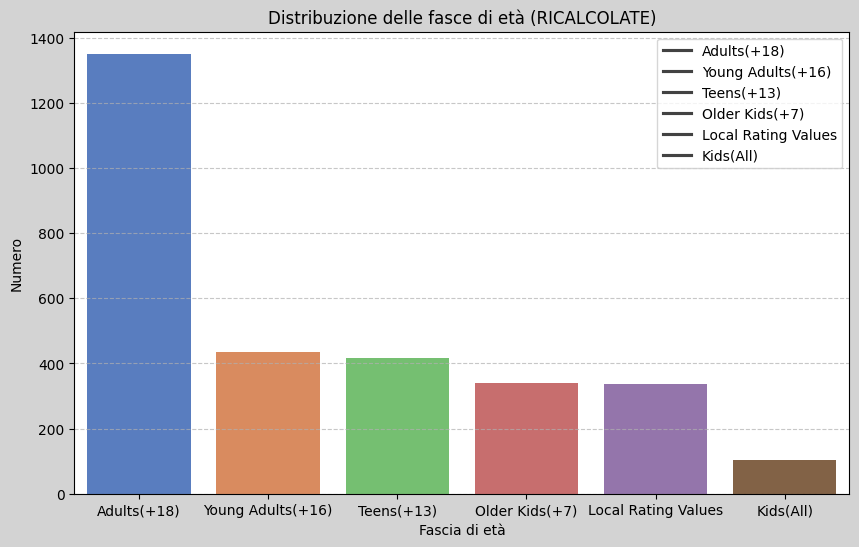

In [20]:
#distribuzione delle età
cleared_certification_counts = clear_age_df['age_certification'].value_counts()

plt.figure(figsize=(10, 6), facecolor='lightgray')
sns.barplot(x=cleared_certification_counts.index, y=cleared_certification_counts.values, palette='muted', hue=cleared_certification_counts.index)

plt.legend(labels=cleared_certification_counts.index)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Distribuzione delle fasce di età (RICALCOLATE)')

plt.xlabel('Fascia di età')
plt.ylabel('Numero')
plt.show()

Da questa nuova suddivisione i contenuti **+18** sembrano rappresentare una porzione **dominante** all'interno del DataFrame. Netfilx assegna questa categoria a tutti i contenuti che includono:
* Contenuto sessuale esplicito
* Violenza estrema
* Linguaggio forte
* Contenuto Horror / Disturbante


In [21]:
clear_age_df['age_certification'].value_counts()

age_certification
Adults(+18)            1351
Young Adults(+16)       436
Teens(+13)              418
Older Kids(+7)          341
Local Rating Values     338
Kids(All)               105
Name: count, dtype: int64

Ci interessa ora capire quali siano i **5 contenuti** multimediali **+18 più valutati** dalla community:

In [22]:
adults_movies = clear_age_df[clear_age_df['age_certification'] == 'Adults(+18)']

top5_adults_movies = adults_movies.sort_values(by='imdb_votes', ascending=False).head(5)

print("I 5 Film e Serie TV più visti della categoria +18 sono: ")
print(top5_adults_movies[['title', 'imdb_votes']])

I 5 Film e Serie TV più visti della categoria +18 sono: 
                   title  imdb_votes
229         Breaking Bad   1727694.0
662     Django Unchained   1472668.0
104  Saving Private Ryan   1346020.0
230     The Walking Dead    945125.0
0            Taxi Driver    795222.0


Visualizzo graficamente quali siano i 10 contenuti +18 più visualizzati tramite un grafico a barre di matplotlib

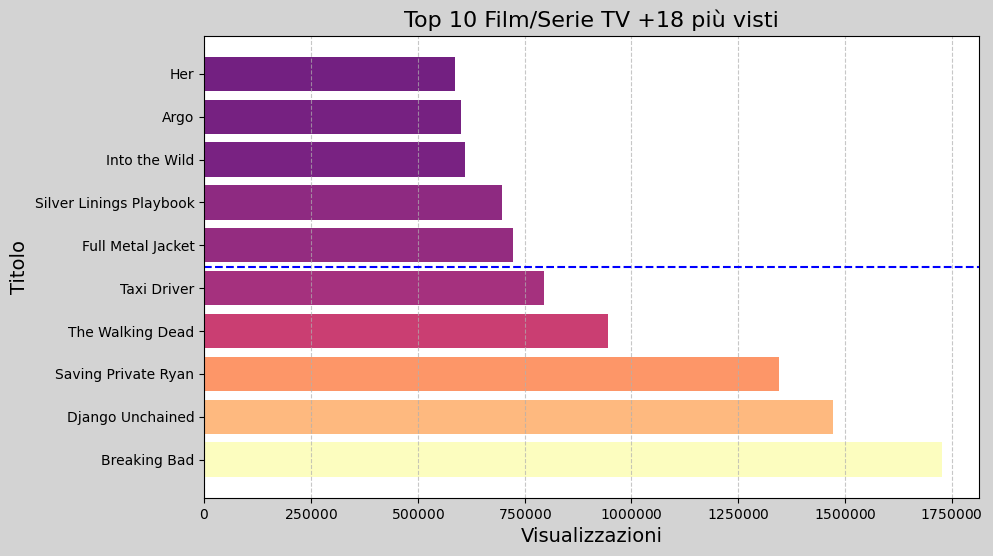

In [23]:
top10_adults_movies = adults_movies.sort_values(by='imdb_votes', ascending=False).head(10)

# Utilizzo una colormap 'magma' per colorare le barre in base ai voti IMDb
colors = plt.cm.magma(top10_adults_movies['imdb_votes'] / max(top10_adults_movies['imdb_votes'])) # type: ignore

plt.figure(figsize=(10, 6), facecolor='lightgray')
plt.barh(top10_adults_movies['title'], top10_adults_movies['imdb_votes'], color=colors)

# Aggiungo una linea per separare i titoli della top 5 dal resto
for i, movie_title in enumerate(top10_adults_movies['title']):
    if movie_title == 'Taxi Driver':
        index_taxi_driver = i
    elif movie_title == 'Full Metal Jacket':
        index_full_metal_jacket = i

plt.axhline((index_taxi_driver + index_full_metal_jacket) / 2, color='b', linestyle='--') # type: ignore

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Top 10 Film/Serie TV +18 più visti', fontsize=16)
plt.xlabel('Visualizzazioni', fontsize=14)
plt.ylabel('Titolo', fontsize=14)

plt.grid(axis='x', linestyle="--", alpha=0.7)

plt.show()

---

## Punteggio IMDb negli anni 

Giunti a questo punto mi interessa paragonare i **punteggi** e le **valutazioni** IMDb per le varie **date di release** dei contenuti, in modo tale da comprenderne l'**andamento medio**

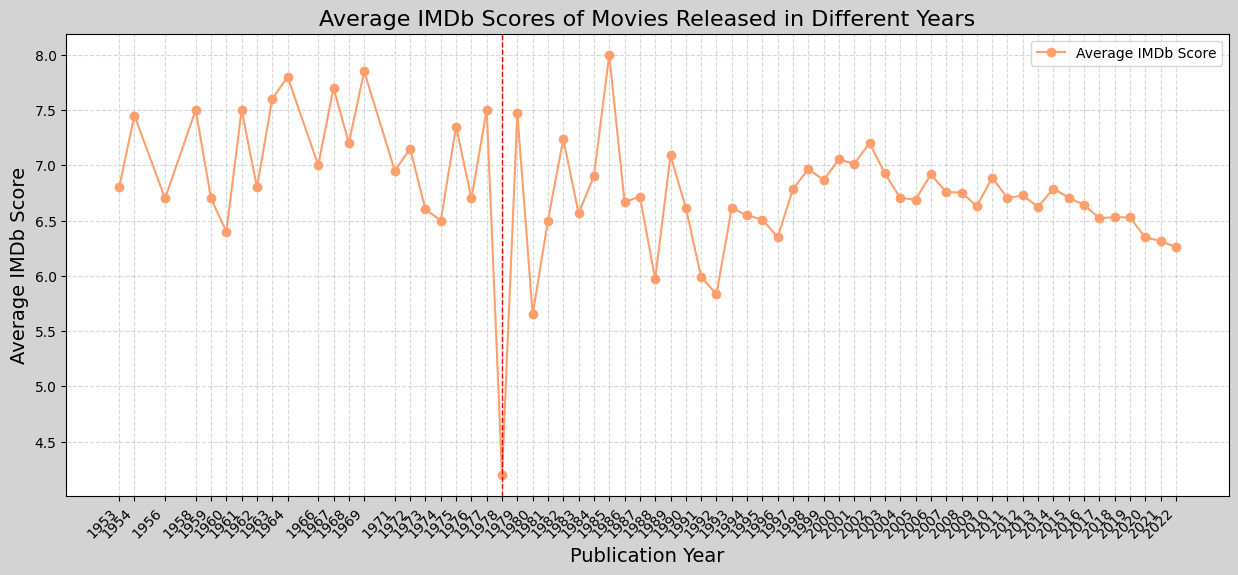

In [24]:
average_imdb_score = df.groupby('release_year')['imdb_score'].mean()

plt.figure(figsize=(15, 6), facecolor='lightgray')

plt.plot(average_imdb_score.index, average_imdb_score, label='Average IMDb Score', marker='o', color=plt.cm.magma(0.8)) #type: ignore

plt.axvline(x=1978, color='r', linestyle='--', linewidth=1)

plt.title("Average IMDb Scores of Movies Released in Different Years", fontsize=16)
plt.xlabel('Publication Year', fontsize=14)
plt.ylabel('Average IMDb Score', fontsize=14)

plt.xticks(average_imdb_score.index, rotation=45, ha='right');

plt.legend()

plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()

Quello che possiamo notare è che c'è stato una **drastica diminuzione** della media di puteggi IMDb per quanto riguarda i film/serie del **1978**

Verifichiamo ora la media di valutazioni sul totale degli anni di release

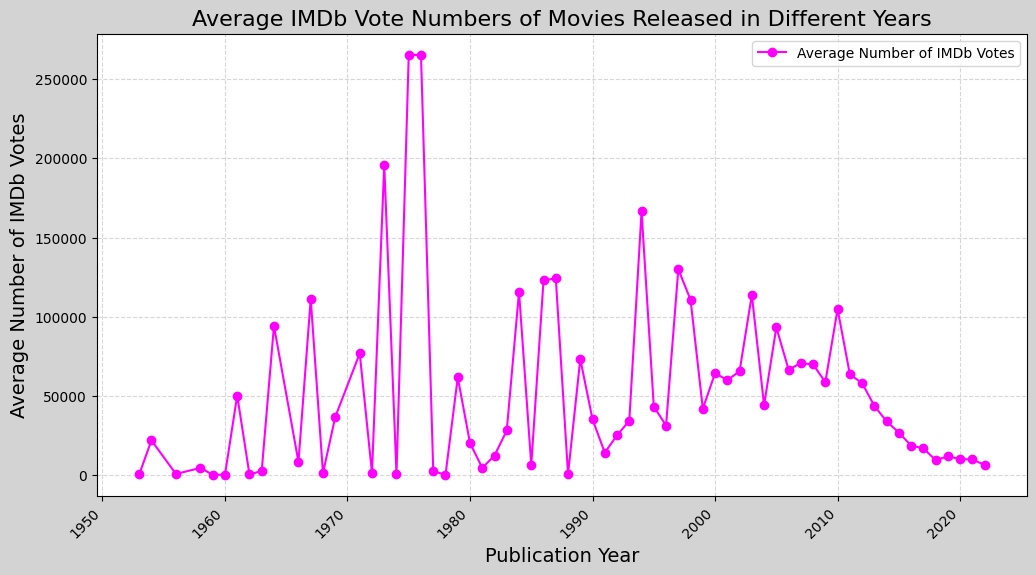

In [25]:
# Average number of IMDb votes by year
average_imdb_votes = df.groupby('release_year')['imdb_votes'].mean()

# Line chart (Average IMDb Votes)
plt.figure(figsize=(12, 6), facecolor='lightgray')

plt.plot(average_imdb_votes.index, average_imdb_votes, label='Average Number of IMDb Votes', marker='o', color='magenta')

plt.title('Average IMDb Vote Numbers of Movies Released in Different Years', fontsize=16)
plt.xlabel('Publication Year', fontsize=14)
plt.ylabel('Average Number of IMDb Votes', fontsize=14)

plt.xticks(rotation=45, ha='right')  
plt.grid(axis='both', linestyle='--', alpha=0.5)

plt.legend()

plt.show()


Da questo grafico risulta invece che circa intorno al **1978** si è registrato un notevole aumento delle valutazioni...

Esaminiamo quindi la **correlazione** tra **punteggio** IMDb e **voti** per capire se i contenuti ad alto punteggio tendono anche a ricevere tante valutazioni

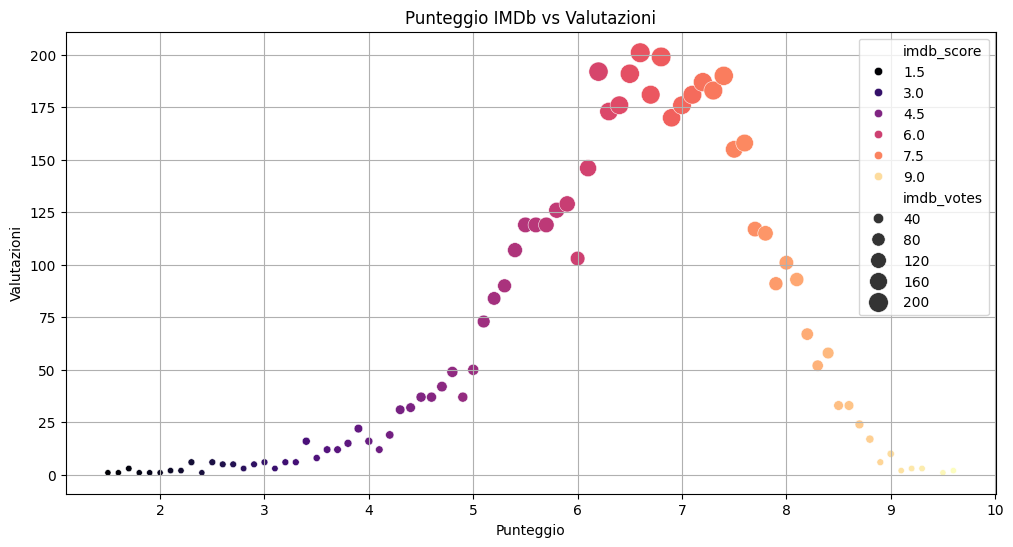

In [26]:
score_counts = df.groupby('imdb_score')['imdb_votes'].count().reset_index()

plt.figure(figsize=(12, 6))

sns.scatterplot(data=score_counts, x='imdb_score', y='imdb_votes', hue='imdb_score', palette='magma', size='imdb_votes', sizes=(20, 200))

plt.title('Punteggio IMDb vs Valutazioni')
plt.xlabel('Punteggio')
plt.ylabel('Valutazioni')

plt.grid()

plt.show()

La visualizzazione mostra una **correlazione mediamente positiva** tra punteggio e valutazioni, questo significa che Film e Serie con score più alto tendono ad avare anche più voti, questo perchè, solitamente, gli utenti tendono a valutare positivamente contenuti che hanno particolarmente apprezzato.

Dal grafico riusciamo a capire anche però che c'è molta **variabilità dei dati**, in particolare ci sono Film/Serie TV con alto punteggio ma valutazioni relativamente basse o viceversa. Questo potrebbe essere dovuto ad alcuni fattori come ad esempio:

* **Ampliamento del pubblico**: se nel '78 il numero di valutazioni è aumentato, il pubblico potrebbe essere aumentato di molto e con esso anche i gusti cinematografici si potrebbero essere diversificati portando ad una dimuzione media dei punteggi dal momento che il campione di interesse include una gamma molto più ampia di prefernze.

* **Cambiamenti del mercato**: se nel 1978 sono usciti molti film con valutazioni basse o che non hanno soddisfatto le aspettative ciò potrebbe influenzare negativamente la media dei punteggi

* **Influenza di film di culto**: esistono film che rappresentano la tradizione cinematografica che potrebbero avere ricevuto un alto numero di valutazioni influenzando positivamente l'aumento delle valutazioni complessive, attirando però su di essi i voti che necessariamente risulteranno complessivamente meno distribuiti se si considera per intero il settore cinematografico per quell'anno

* ...

In generale la visualizzazione ci offre un'utile panoramica riguardo al rapporto tra queste 2 entità, dimostrandone la correlazione positiva ma anche l'alta variabilità dei dati

---

### Relazione tra **punteggio** IMDb e **tempo di visualizzazione**

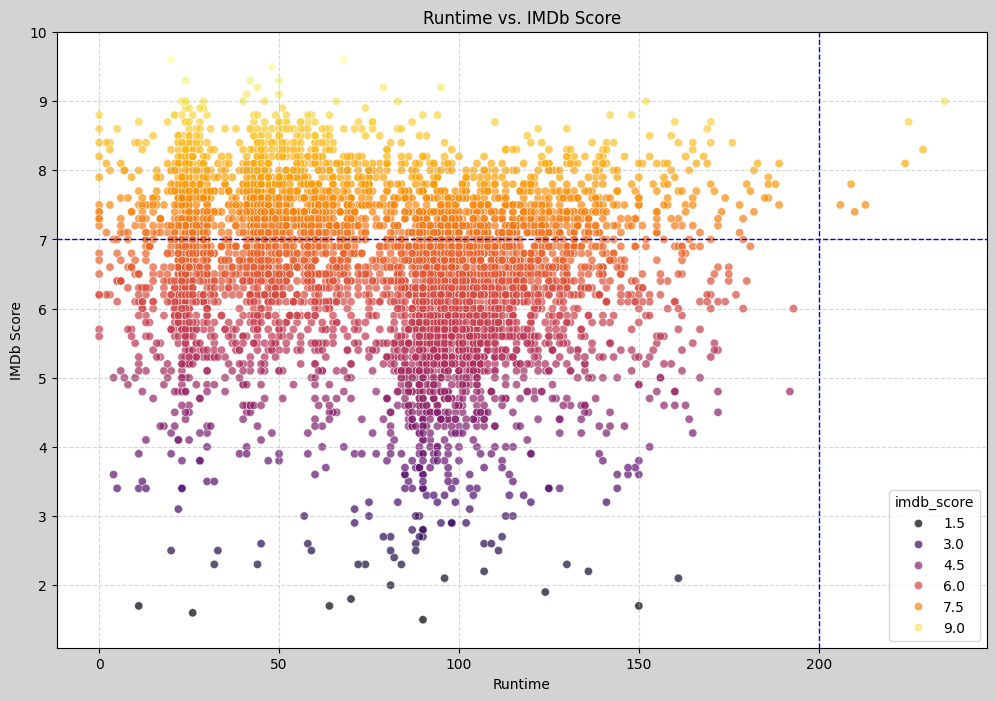

In [36]:
# Scatter plot
plt.figure(figsize=(12, 8), facecolor='lightgray')

sns.scatterplot(x='runtime', y='imdb_score', data=df, hue='imdb_score', palette='inferno', alpha=0.7)

# Delimita l'area in cui imdb_score è maggiore di 7 con una linea verticale rossa
plt.axvline(x=200, color='b', linestyle='--', linewidth=1, label='Runtime > 200')

# Delimita l'area in cui runtime è maggiore di 200 con una linea orizzontale rossa
plt.axhline(y=7, color='b', linestyle='--', linewidth=1, label='IMDb Score > 7')

plt.title('Runtime vs. IMDb Score')
plt.xlabel('Runtime')
plt.ylabel('IMDb Score')

plt.grid(axis='both', linestyle='--', alpha=0.5)

plt.show()

Questa rappresentazione grafica dimostra che tutti i film/serie TV con lunghezza complessiva superiore a **200** minuti, sono solitamente molto apprezzati dal pubblico, infatti possiedono almeno una valutazione IMDb superiore a **7.0** *(area delimitata in blu)*

Inoltre dallo scatter-plot risulta esserci un solo contenuto con valutazione IMDb di circa 9.0 e runtime superiore a 200:

- [No Longer Kids](https://www.imdb.com/title/tt8312792/)

In [28]:
df[(df['runtime'] > 200) & (df['imdb_score'] >= 9)]

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
24,24,tm76557,No Longer Kids,MOVIE,"By coincidence, Ahmad discovers that his fathe...",1979,NaN,235,tt8312792,9.0,943.0


---

## Tendenza di pubblicazione di contenuti negli anni


Il seguente grafico mostra la **tendenza** di Film e Serie TV ad essere rilasciati negli anni circa dagli anni '50 al 2022. I dati sono mostrati attraverso un **grafico a linea** che possiede:
* Asse x: **Anni di release**
* Asse y: **Numero di Contenuti**

La linea azzura rappresenta i ***Film*** <br>
La linea arancione rappresenta le ***Serie TV***

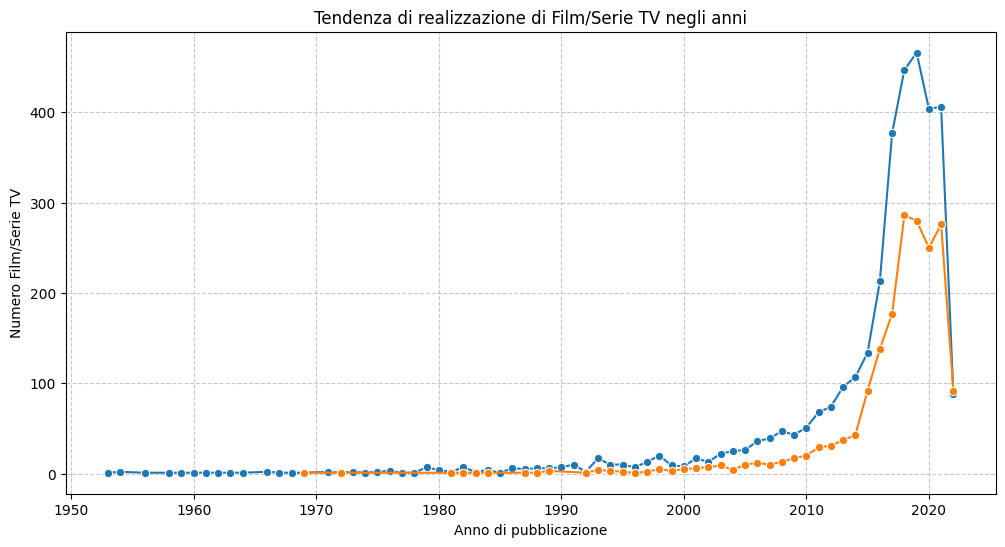

In [29]:
movies = df[df['type']=='MOVIE']
movie_count = movies['release_year'].value_counts().sort_index()

shows = df[df['type']=='SHOW']
shows_count = shows['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

sns.lineplot(x=movie_count.index, y=movie_count.values, marker='o')
sns.lineplot(x=shows_count.index, y=shows_count.values, marker='o')

plt.title("Tendenza di realizzazione di Film/Serie TV negli anni")
plt.xlabel("Anno di pubblicazione")
plt.ylabel("Numero Film/Serie TV")
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()

Questa visualizzazione ci permette di affermare che il numero di contenuti rilasciati è **aumentato costantemente** nel tempo. Negli anni '50 non c'erano altro che circa **5 film/serie disponibili**, mentre dal 2020 questo numero è aumentato a dismisura fino a superare i **400 titoli**.

Riprendendo quanto compreso precedentemente, dal grafico riusciamo a capire che il numero totale di film è nettamente superiore al numero di serie per l'intero periodo preso in considerazione. Sebbene la differenza di quantità tra i due risulta essere inizialmente poca, negli anni intorno al 2020, periodo di picco per la tendenza di pubblicazione di contenuti, mostra una notevole differenza, infatti i film risultano essere circa **200 in più** rispetto alle serie.

Nonostante tutto la visualizzazione mostra che l'industria cinematografica e dell'intrattenimento è cresciuta **significativamente** negli ultimi **70 anni**.

---

### Relazione tra anno di release, punteggio e valutazioni

<Axes: >

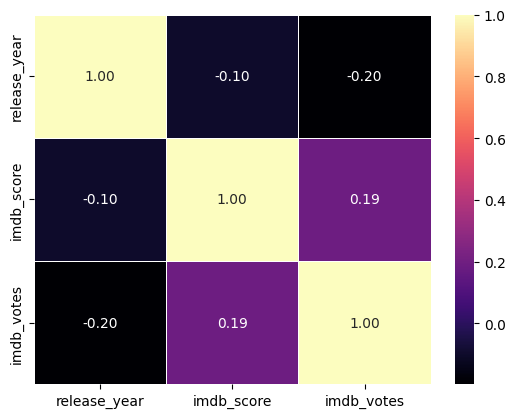

In [30]:
heatmap_data = df[['release_year', 'imdb_score', 'imdb_votes']].corr()
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='magma', cbar=True, linewidths=0.5)

Utilizziamo una heatmap per l'analisi, ma dalla visualizzazione dati riusciamo a capire che non c'è una stretta correlazione tra **anno di rilascio** e **gradimento** dei contenuti, ma solo tra punteggio e numero di valutazioni, come abbiamo già scoperto precedentemente, questo può essere dovuto a vari fattori tra cui:

* **Diversità di generi cinematografici**: nel corso degli anni la varietà di generi è aumentata esponenzialmente e questo potrebbe aver causato un gradimento molto più variegato e quindi mediamente basso, senza una categoria che spicca sopra le altre.

* **Cambiamenti dei gusti**: le preferenze del pubblico cambiano nel tempo e questo significa che ciò che era popolare in un determinato periodo storico potrebbe non necessariamente essere ugualmente apprezzato in un altro.

* **Saturazione del mercato**: un periodo temporale potrebbe essere caratterizzato dalla presenza di un alto numero di contenuti disponibili contemporaneamente che genera una varietà di gradimento piuttosto estesa, che contribuisce alla bassa correlazione.

---

### Anlisi temporale

Quale è il rapporto tra punteggio IMDb e valutazioni e come cambiano negli anni.

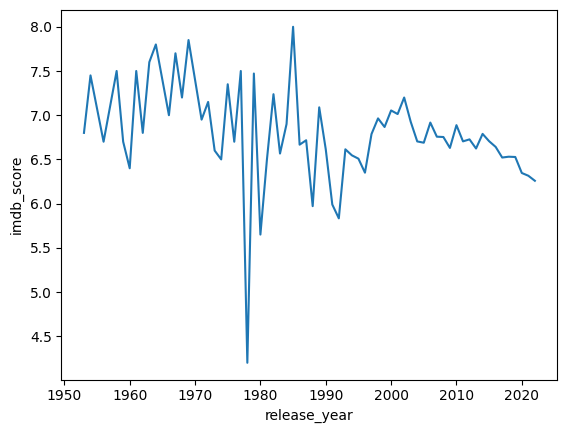

In [31]:
sns.lineplot(data=df, y='imdb_score', x='release_year', errorbar=None)

plt.show()

In base al precedente grafico, risulta evidente che film e serie rilasciati nei primi anni '50 tendono a mostrare punteggi più elevati, probabilmente a causa della **bassa offerta** di titoli presentati dall'industria cinematografica del tempo. Inoltre analizzando ogni anno, si può osservare un notevole e costante **declino** di punteggi, in particolare introno all'anno **1978** in cui si verifica una netta **caduta** della media di valutazioni fno sotto al **4.5**.

---

### Conclusione

Il gradimento dei contenuti tende a calare con il passare degli anni, probabilmente a causa della sempre maggiore **diversificazione** di generi disponibili che permette al pubblico di **focalizzarsi** solo su una determianta catgoria di film/serie Tv, scegliere determinati contenuti come **preferiti**, stilare le proprie "**tier-list**" e quindi in qualche modo diventare una sorta di "**esperti del settore**", ricercando dalle nuove uscite sempre qualcosa in più, diventando quindi sempre più **critici**.

---

### Fonti

* Piattaforma di riferimento: [Kaggle](https://www.kaggle.com)
* Dataset: [Netflix IMDB Scores](https://www.kaggle.com/datasets/thedevastator/netflix-imdb-scores)
* Informazioni su film: [IMDb](https://www.imdb.com)
* Informazioni generali: [Wikipedia](https://it.wikipedia.org/wiki/Pagina_principale)
* Operazioni base: Appunti in classe
* Supporto per visualizzazione dati: [Matplotlib](https://matplotlib.org) & [Seaborn](https://seaborn.pydata.org)
* Markdown python notebook: [Markdown Guide](https://www.markdownguide.org/basic-syntax/#:~:text=To%20bold%20text%2C%20add%20two,without%20spaces%20around%20the%20letters.&text=I%20just%20love%20**bold%20text**.)
* Risoluzione problemi: Appunti + [StackOverflow](https://stackoverflow.com)
